In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_CSV_data = pd.read_csv('bank_full_a.csv', delimiter=';')

In [3]:
pd.set_option('display.max_columns', None)
raw_CSV_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
raw_CSV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
raw_CSV_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Identifying numerical and categrorical columns in raw Data

In [6]:
all_columns_list = raw_CSV_data.columns
numerical_columns_list = raw_CSV_data.describe().columns
non_numerical_columns_list = [x for x in all_columns_list if x not in numerical_columns_list]
non_numerical_columns_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

# Creating a small series with categorical variables and their unique values

In [7]:
unique_values= []
for i in range(len(non_numerical_columns_list)):
    unique_values.append(pd.unique(raw_CSV_data[non_numerical_columns_list[i]]))
    
unique_values = pd.Series(unique_values)
unique_values.index = non_numerical_columns_list

In [8]:
unique_values

job            [housemaid, services, admin., blue-collar, tec...
marital                     [married, single, divorced, unknown]
education      [basic.4y, high.school, basic.6y, basic.9y, pr...
default                                       [no, unknown, yes]
housing                                       [no, yes, unknown]
loan                                          [no, yes, unknown]
contact                                    [telephone, cellular]
month          [may, jun, jul, aug, oct, nov, dec, mar, apr, ...
day_of_week                            [mon, tue, wed, thu, fri]
poutcome                         [nonexistent, failure, success]
y                                                      [no, yes]
dtype: object

# Analysing Correlation

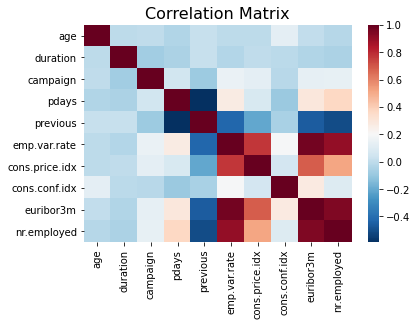

In [9]:
corr_numeric = raw_CSV_data[numerical_columns_list].corr()

sns.heatmap(corr_numeric, cbar = True, cmap = "RdBu_r")
plt.title("Correlation Matrix", fontsize = 16)
plt.show()

In [10]:
CORRELATION_THRESHOLD = 0.7
corr_numeric

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


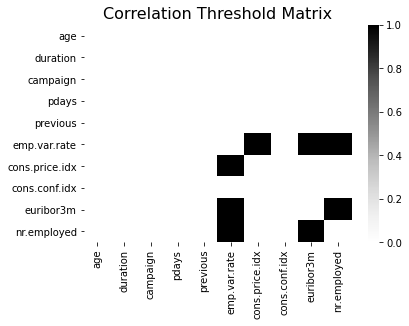

In [11]:
corr_numeric_bool = ((corr_numeric ** 2 ) ** 0.5) > CORRELATION_THRESHOLD

# start of for loop -- to remove the self correlation.
for i in range(len(corr_numeric_bool.columns)):
    for j in range(len(corr_numeric_bool.columns)):
        if(i==j):
            corr_numeric_bool[corr_numeric_bool.columns[i]][corr_numeric_bool.columns[j]] = False
# end of for loop   

sns.heatmap(corr_numeric_bool, cbar=True, cmap = 'Greys')
plt.title("Correlation Threshold Matrix", fontsize=16)
plt.show()

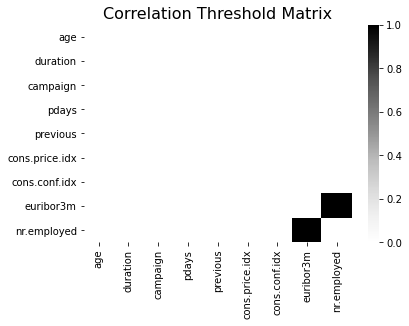

In [12]:
# Highest correlated data
corr_numeric_bool = corr_numeric_bool.drop('emp.var.rate', axis=0)
corr_numeric_bool = corr_numeric_bool.drop('emp.var.rate', axis=1)

sns.heatmap(corr_numeric_bool, cbar=True, cmap = 'Greys')
plt.title("Correlation Threshold Matrix", fontsize=16)
plt.show()

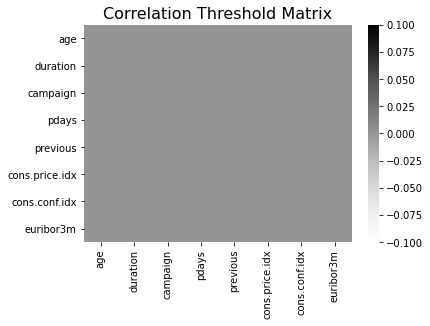

In [13]:
# Highest correlated data
corr_numeric_bool = corr_numeric_bool.drop('nr.employed', axis=0)
corr_numeric_bool = corr_numeric_bool.drop('nr.employed', axis=1)

sns.heatmap(corr_numeric_bool, cbar=True, cmap = 'Greys')
plt.title("Correlation Threshold Matrix", fontsize=16)
plt.show()

# Creating CheckPoint -1 - Here the target column is converted from yes and no to 1 and 0 respectively.

In [14]:
targets_modified_data = raw_CSV_data
targets_modified_data['y'] = targets_modified_data['y'].replace('yes',1)
targets_modified_data['y'] = targets_modified_data['y'].replace('no',0)
targets_modified_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [15]:
stratified_data_ratio_yes_vs_no = sum(targets_modified_data['y'])/len(targets_modified_data['y'])
stratified_data_ratio_yes_vs_no

0.11265417111780131

# Creating CheckPoint -2 - Hot Encoding of categorical columns

In [16]:
all_columns_list = targets_modified_data.columns
numerical_columns_list = targets_modified_data.describe().columns
non_numerical_columns_list = [x for x in all_columns_list if x not in numerical_columns_list]
non_numerical_columns_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [17]:
categorical_data = targets_modified_data[non_numerical_columns_list]
numerical_data = targets_modified_data[numerical_columns_list]

In [18]:
categorical_data_flagged = pd.get_dummies(categorical_data,drop_first = True)
categorical_data_flagged

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# Creating scaled numerical data

In [19]:
import sklearn.preprocessing as skp

numerical_data_scaled = skp.minmax_scale(numerical_data.drop('y', axis=1))

In [20]:
numerical_data_scaled = pd.DataFrame(numerical_data_scaled,columns = numerical_columns_list.drop('y'))
numerical_data_scaled.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


# Combining Categorical and Numerical Data for Model

In [21]:
scaled_data = categorical_data_flagged
scaled_data[numerical_data_scaled.columns] = numerical_data_scaled
scaled_data['y'] = targets_modified_data['y']
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job_blue-collar                41188 non-null  uint8  
 1   job_entrepreneur               41188 non-null  uint8  
 2   job_housemaid                  41188 non-null  uint8  
 3   job_management                 41188 non-null  uint8  
 4   job_retired                    41188 non-null  uint8  
 5   job_self-employed              41188 non-null  uint8  
 6   job_services                   41188 non-null  uint8  
 7   job_student                    41188 non-null  uint8  
 8   job_technician                 41188 non-null  uint8  
 9   job_unemployed                 41188 non-null  uint8  
 10  job_unknown                    41188 non-null  uint8  
 11  marital_married                41188 non-null  uint8  
 12  marital_single                 41188 non-null 

# Dividing Dataset into train, validation and test

In [22]:
total_data_length = len(scaled_data['y'])
total_yes_length = sum(scaled_data['y'])

train_data_length = int(0.8 * total_data_length)
validation_data_length = int(0.1 * total_data_length)
test_data_length = total_data_length - (train_data_length + validation_data_length)

train_yes_data_length = int(0.8 * total_yes_length)
validation_yes_data_length = int(0.1 * total_yes_length)
test_yes_data_length = total_yes_length - (train_yes_data_length + validation_yes_data_length)

train_no_data_length = train_data_length - train_yes_data_length
validation_no_data_length = validation_data_length - validation_yes_data_length
test_no_data_length = test_data_length - test_yes_data_length

In [23]:
randomized_scaled_data = scaled_data.sample(frac = 1)
randomized_scaled_data

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.333333,0.005083,0.090909,1.0,0.000000,1.000000,0.882307,0.376569,0.982317,1.000000,0
2944,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0.234568,0.135828,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957833,0.859735,0
25831,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.222222,0.059577,0.018182,1.0,0.142857,0.687500,0.389322,0.368201,0.790297,0.877883,0
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0.432099,0.040057,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0
19657,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.456790,0.087231,0.036364,1.0,0.000000,1.000000,0.484412,0.615063,0.982544,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.296296,0.031924,0.018182,1.0,0.000000,1.000000,0.882307,0.376569,0.980957,1.000000,0
26973,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.283951,0.167751,0.090909,1.0,0.142857,0.687500,0.389322,0.368201,0.780322,0.877883,0
7000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0.185185,0.005490,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,0
33946,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0.061728,0.040057,0.018182,1.0,0.000000,0.333333,0.269680,0.192469,0.146679,0.512287,0


In [24]:
randomized_scaled_data = randomized_scaled_data.reset_index(drop = True)
randomized_scaled_data

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.333333,0.005083,0.090909,1.0,0.000000,1.000000,0.882307,0.376569,0.982317,1.000000,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0.234568,0.135828,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957833,0.859735,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.222222,0.059577,0.018182,1.0,0.142857,0.687500,0.389322,0.368201,0.790297,0.877883,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0.432099,0.040057,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.456790,0.087231,0.036364,1.0,0.000000,1.000000,0.484412,0.615063,0.982544,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.296296,0.031924,0.018182,1.0,0.000000,1.000000,0.882307,0.376569,0.980957,1.000000,0
41184,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.283951,0.167751,0.090909,1.0,0.142857,0.687500,0.389322,0.368201,0.780322,0.877883,0
41185,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0.185185,0.005490,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,0
41186,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0.061728,0.040057,0.018182,1.0,0.000000,0.333333,0.269680,0.192469,0.146679,0.512287,0


In [25]:
randomized_scaled_data_yes = randomized_scaled_data[randomized_scaled_data['y']==1]
randomized_scaled_data_yes = randomized_scaled_data_yes.reset_index(drop = True)
randomized_scaled_data_no = randomized_scaled_data[randomized_scaled_data['y']==0]
randomized_scaled_data_no = randomized_scaled_data_no.reset_index(drop = True)

In [26]:
train_data = randomized_scaled_data_yes[:train_yes_data_length]
train_data = train_data.append(randomized_scaled_data_no[:train_no_data_length])

validation_data = randomized_scaled_data_yes[train_yes_data_length : train_yes_data_length + validation_yes_data_length]
validation_data = validation_data.append(randomized_scaled_data_no[train_no_data_length : train_no_data_length + validation_no_data_length])

test_data = randomized_scaled_data_yes[train_yes_data_length + validation_yes_data_length:]
test_data = test_data.append(randomized_scaled_data_no[train_no_data_length + validation_no_data_length:])

In [27]:
train_data_inputs = train_data.drop('y', axis=1).astype(np.float)
train_data_targets = train_data['y']

validation_data_inputs = validation_data.drop('y', axis=1).astype(np.float)
validation_data_targets = validation_data['y']

test_data_inputs = test_data.drop('y', axis=1).astype(np.float)
test_data_targets = test_data['y']

# Converting the dataframe to npz format for tensorflow

In [28]:
train_data_inputs = train_data_inputs.to_numpy()
train_data_targets = train_data_targets.to_numpy()

validation_data_inputs = validation_data_inputs.to_numpy()
validation_data_targets = validation_data_targets.to_numpy()

test_data_inputs = test_data_inputs.to_numpy()
test_data_targets = test_data_targets.to_numpy()

In [29]:
np.savez('Bank_data_train',inputs=train_data_inputs,targets=train_data_targets)
np.savez('Bank_data_validation',inputs=validation_data_inputs,targets=validation_data_targets)
np.savez('Bank_data_test',inputs=test_data_inputs,targets=test_data_targets)

# Model Building using Tensorflow

In [30]:
import tensorflow as tf

In [31]:
npz = np.load('Bank_data_train.npz')

train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('Bank_data_validation.npz')

validation_inputs = npz['inputs'].astype(np.float)
validation_targets = npz['targets'].astype(np.int)

npz = np.load('Bank_data_test.npz')

test_inputs = npz['inputs'].astype(np.float)
test_targets = npz['targets'].astype(np.int)

In [34]:
input_size = train_data_inputs.shape[0]
output_size = 2
hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 10
max_epochs = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_inputs,
          train_targets,
          batch_size=batch_size,
          epochs = max_epochs,
          callbacks = [early_stopping],
          validation_data = (validation_inputs,validation_targets),
          verbose = 2)

Train on 32950 samples, validate on 4118 samples
Epoch 1/1000
32950/32950 - 4s - loss: 0.2411 - accuracy: 0.9027 - val_loss: 0.2049 - val_accuracy: 0.9097
Epoch 2/1000
32950/32950 - 4s - loss: 0.1961 - accuracy: 0.9091 - val_loss: 0.1986 - val_accuracy: 0.9017
Epoch 3/1000
32950/32950 - 4s - loss: 0.1896 - accuracy: 0.9119 - val_loss: 0.2038 - val_accuracy: 0.9038
Epoch 4/1000
32950/32950 - 4s - loss: 0.1859 - accuracy: 0.9134 - val_loss: 0.1950 - val_accuracy: 0.9097
Epoch 5/1000
32950/32950 - 4s - loss: 0.1821 - accuracy: 0.9159 - val_loss: 0.2048 - val_accuracy: 0.9075
Epoch 6/1000
32950/32950 - 4s - loss: 0.1791 - accuracy: 0.9166 - val_loss: 0.1908 - val_accuracy: 0.9075
Epoch 7/1000
32950/32950 - 4s - loss: 0.1769 - accuracy: 0.9168 - val_loss: 0.1941 - val_accuracy: 0.9036
Epoch 8/1000
32950/32950 - 4s - loss: 0.1740 - accuracy: 0.9184 - val_loss: 0.1901 - val_accuracy: 0.9097
Epoch 9/1000
32950/32950 - 4s - loss: 0.1722 - accuracy: 0.9187 - val_loss: 0.1955 - val_accuracy: 0.90

In [35]:
test_loss, test_accuracy = model.evaluate(test_inputs,test_targets)

4120/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================